<a href="https://colab.research.google.com/github/mattgarippa/Google-Trends/blob/master/Turtle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def get_turtle_signals(data, entry_period=20, exit_period=10):
    signals = pd.DataFrame(index=data.index, columns=['Entry_Long', 'Entry_Short', 'Exit_Long', 'Exit_Short'])

    signals['Entry_Long'] = data['Close'] > data['High'].rolling(window=entry_period).max().shift(1)
    signals['Entry_Short'] = data['Close'] < data['Low'].rolling(window=entry_period).min().shift(1)
    signals['Exit_Long'] = data['Close'] < data['Low'].rolling(window=exit_period).min().shift(1)
    signals['Exit_Short'] = data['Close'] > data['High'].rolling(window=exit_period).max().shift(1)

    return signals

def turtle_trading_multi(symbols, start_date, end_date, entry_period=20, exit_period=10):
    all_data = {}
    all_signals = {}

    for symbol in symbols:
        data = yf.download(symbol, start=start_date, end=end_date)
        signals = get_turtle_signals(data, entry_period, exit_period)
        all_data[symbol] = data
        all_signals[symbol] = signals

    return all_data, all_signals

#get last active signal
def get_last_signals(all_signals):
    last_signals = []
    for symbol, signals in all_signals.items():
        last_signal_date = signals.index[-1]
        last_signal_row = signals.iloc[-1]
        if last_signal_row['Entry_Long']:
            signal = "Entry Long"
        elif last_signal_row['Entry_Short']:
            signal = "Entry Short"
        elif last_signal_row['Exit_Long']:
            signal = "Exit Long"
        elif last_signal_row['Exit_Short']:
            signal = "Exit Short"
        else:
            signal = "No Signal"
        last_signals.append([symbol, signal, last_signal_date.date()])
    return last_signals


#get last active signal
def get_last_active_signals(all_signals):
    last_active_signals = []
    for symbol, signals in all_signals.items():
        for i in range(len(signals) - 1, -1, -1):
            row = signals.iloc[i]
            if row['Entry_Long']:
                signal = "Entry Long"
                break
            elif row['Entry_Short']:
                signal = "Entry Short"
                break
            elif row['Exit_Long']:
                signal = "Exit Long"
                break
            elif row['Exit_Short']:
                signal = "Exit Short"
                break
        else:
            signal = "No Signal"

        if signal != "No Signal":
            last_active_signals.append([symbol, signal, signals.index[i].date()])
        else:
            last_active_signals.append([symbol, signal, "N/A"])

    return last_active_signals

#print daily signal
def print_daily_signals(all_signals, date):
    print(f"\nSignals for {date.date()}:")
    for symbol, signals in all_signals.items():
        if date in signals.index:
            day_signals = signals.loc[date]
            print(f"{symbol}:")
            if day_signals['Entry_Long']:
                print("  - Entry Long Signal")
            if day_signals['Entry_Short']:
                print("  - Entry Short Signal")
            if day_signals['Exit_Long']:
                print("  - Exit Long Signal")
            if day_signals['Exit_Short']:
                print("  - Exit Short Signal")
            if not any(day_signals):
                print("  - No Signal")
        else:
            print(f"{symbol}: No data available")
    print()

# Example usage ['SPY', 'GC=F', '^TNX', '^TYX', 'GBPUSD=X', 'EURUSD=X', 'JPY=X', 'CADUSD=X', 'SI=F', '2YY=F']
symbols = ['SPY', 'GLD', 'SLV', 'SCHO', 'IEI', 'IEF', 'GOVT', 'GBPUSD=X', 'EURUSD=X', 'JPY=X']
start_date = '2023-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

all_data, all_signals = turtle_trading_multi(symbols, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
from tabulate import tabulate
# Print table of last signals
last_signals = get_last_signals(all_signals)
print("\nLast Signals Table:")
print(tabulate(last_signals, headers=['Ticker', 'Last Signal', 'Date'], tablefmt='grid'))


Last Signals Table:
+----------+---------------+------------+
| Ticker   | Last Signal   | Date       |
+==========+===============+============+
| SPY      | No Signal     | 2025-02-12 |
+----------+---------------+------------+
| GLD      | No Signal     | 2025-02-12 |
+----------+---------------+------------+
| SLV      | No Signal     | 2025-02-12 |
+----------+---------------+------------+
| SCHO     | Exit Long     | 2025-02-12 |
+----------+---------------+------------+
| IEI      | Exit Long     | 2025-02-12 |
+----------+---------------+------------+
| IEF      | Exit Long     | 2025-02-12 |
+----------+---------------+------------+
| GOVT     | Exit Long     | 2025-02-12 |
+----------+---------------+------------+
| GBPUSD=X | No Signal     | 2025-02-12 |
+----------+---------------+------------+
| EURUSD=X | No Signal     | 2025-02-12 |
+----------+---------------+------------+
| JPY=X    | No Signal     | 2025-02-12 |
+----------+---------------+------------+


In [ ]:
# Print table of last active signals
last_active_signals = get_last_active_signals(all_signals)
print("\nLast Active Signals Table:")
print(tabulate(last_active_signals, headers=['Ticker', 'Last Active Signal', 'Date'], tablefmt='grid'))


Last Active Signals Table:
+----------+----------------------+------------+
| Ticker   | Last Active Signal   | Date       |
+==========+======================+============+
| SPY      | Entry Long           | 2025-01-23 |
+----------+----------------------+------------+
| GLD      | Entry Long           | 2025-02-05 |
+----------+----------------------+------------+
| SLV      | Entry Long           | 2025-02-04 |
+----------+----------------------+------------+
| SCHO     | Entry Long           | 2025-02-05 |
+----------+----------------------+------------+
| IEI      | Entry Long           | 2025-02-05 |
+----------+----------------------+------------+
| IEF      | Entry Long           | 2025-02-05 |
+----------+----------------------+------------+
| GOVT     | Entry Long           | 2025-02-05 |
+----------+----------------------+------------+
| GBPUSD=X | Exit Long            | 2024-12-20 |
+----------+----------------------+------------+
| EURUSD=X | Exit Long            | 2025-

[*********************100%***********************]  10 of 10 completed


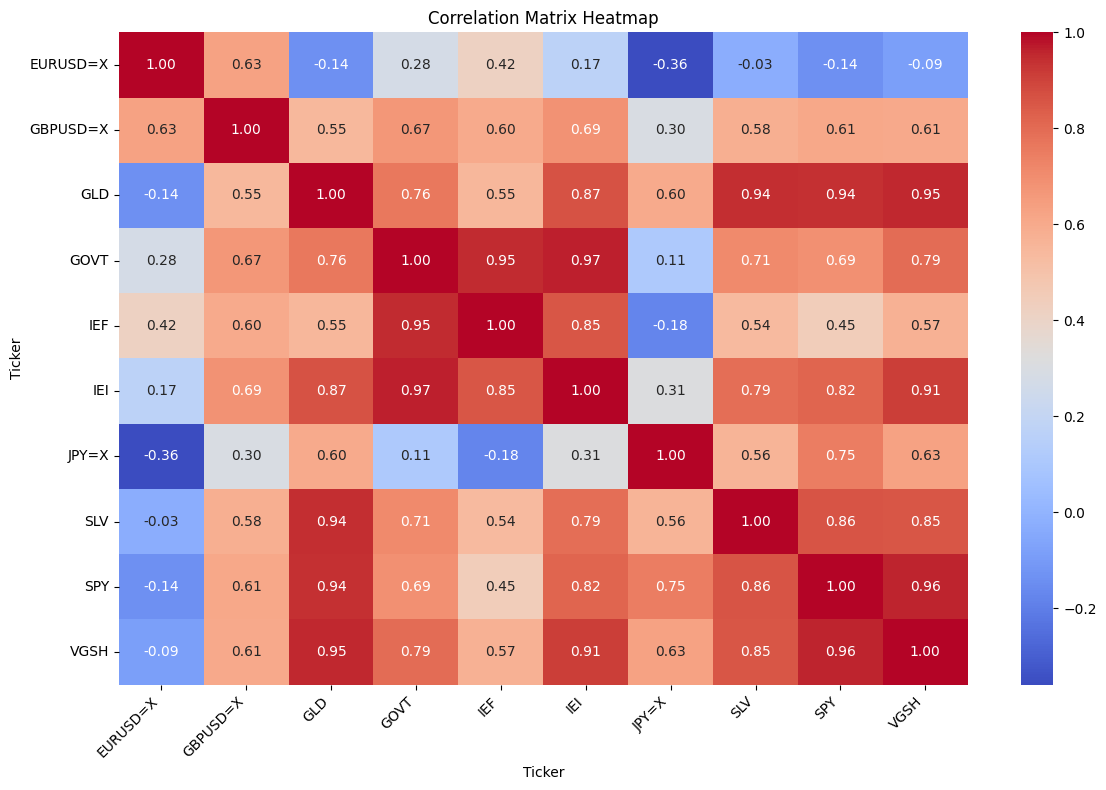

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

#Compute the correlation matrix
# Download historical price data for the securities
data = yf.download(symbols, start=start_date, end=end_date)['Close']
correlation_matrix = data.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

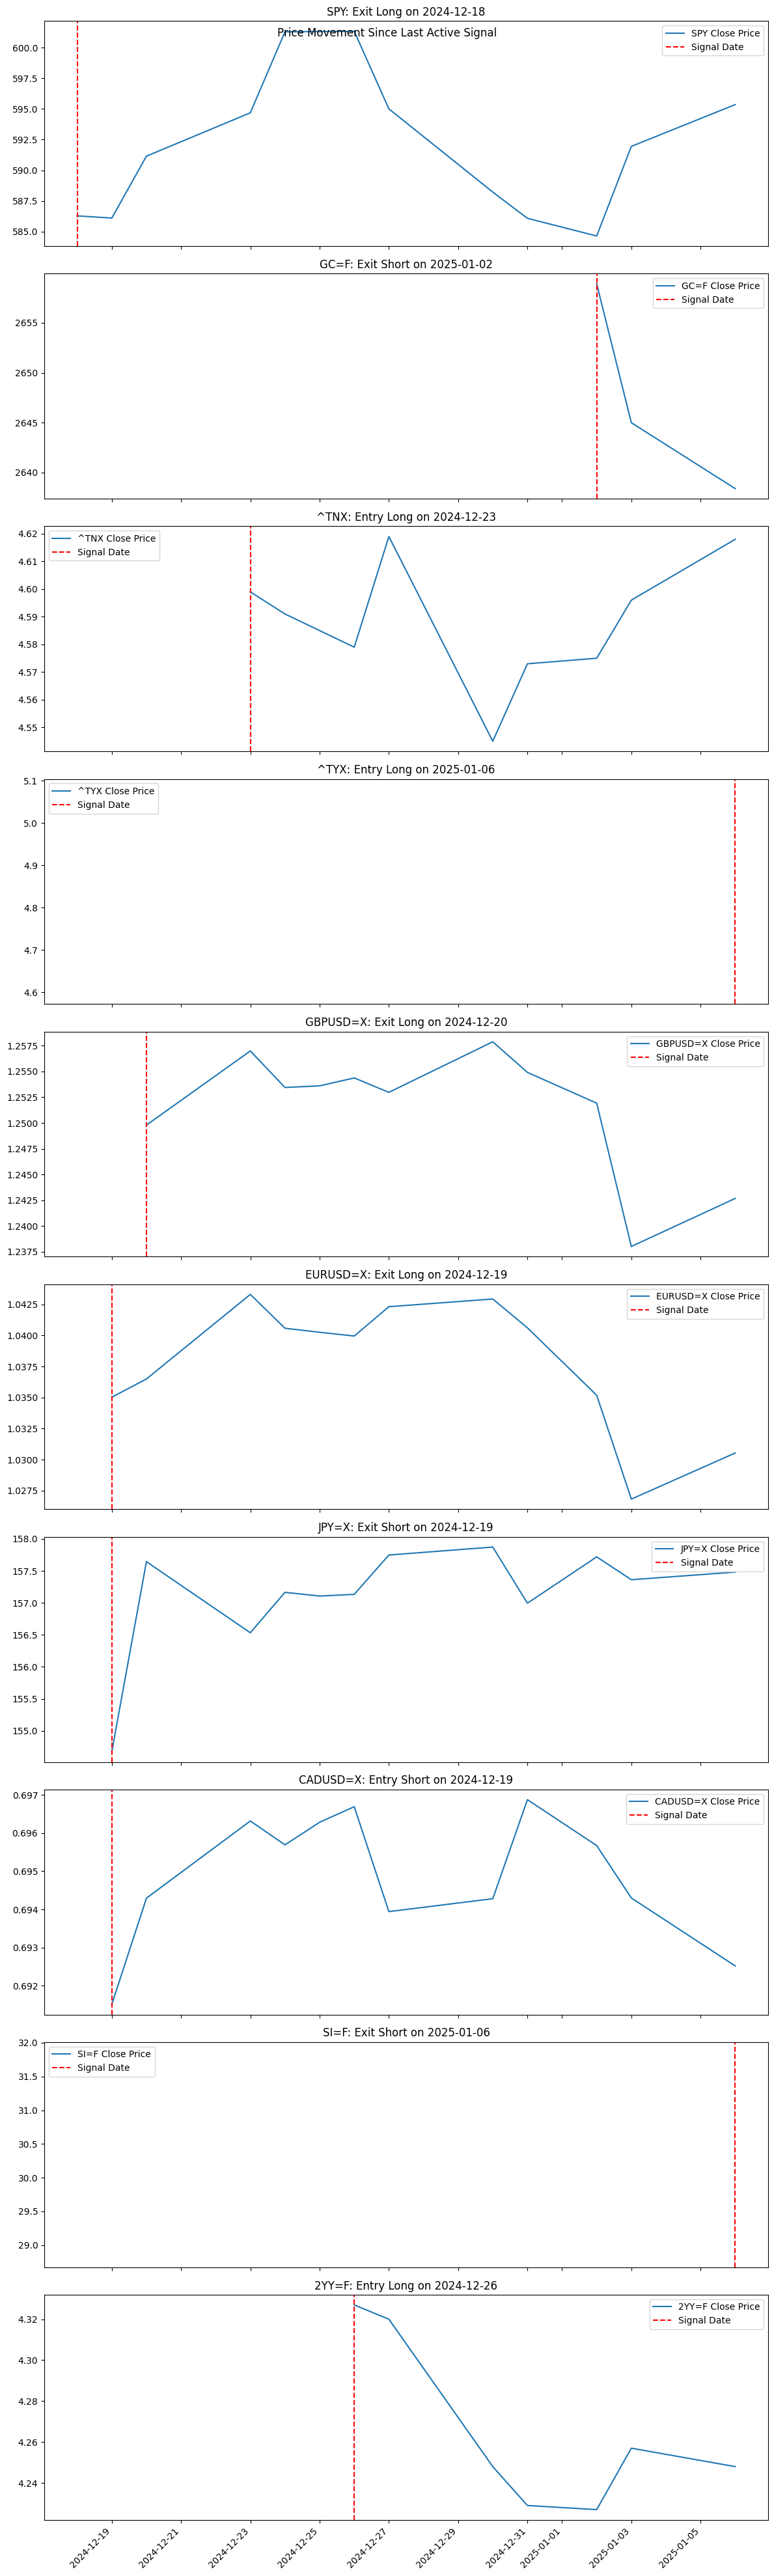

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

def plot_prices_since_last_signal(all_data, all_signals, last_active_signals):
    fig, axs = plt.subplots(len(last_active_signals), 1, figsize=(12, 4*len(last_active_signals)), sharex=True)
    fig.suptitle("Price Movement Since Last Active Signal")

    for i, (symbol, signal, date) in enumerate(last_active_signals):
        ax = axs[i] if len(last_active_signals) > 1 else axs

        if date != "N/A":
            signal_date = pd.Timestamp(date)
            prices = all_data[symbol].loc[signal_date:]
            ax.plot(prices.index, prices['Close'], label=f"{symbol} Close Price")
            ax.axvline(x=signal_date, color='r', linestyle='--', label='Signal Date')
            ax.set_title(f"{symbol}: {signal} on {date}")
        else:
            ax.text(0.5, 0.5, f"No active signal for {symbol}", ha='center', va='center')

        ax.legend()
        ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# After calculating last_active_signals
plot_prices_since_last_signal(all_data, all_signals, last_active_signals)


In [ ]:
# Allow user to check signals for a specific date
while True:
    user_date = input("Enter a date to check signals (YYYY-MM-DD) or 'q' to quit: ")
    if user_date.lower() == 'q':
        break
    try:
        check_date = pd.Timestamp(user_date)
        print_daily_signals(all_signals, check_date)
    except ValueError:
        print("Invalid date format. Please use YYYY-MM-DD.")


In [ ]:
# Print signals for the last 5 trading days
last_5_days = sorted(set(sum([list(signals.index) for signals in all_signals.values()], [])))[-5:]
# Instead of using pd.concat directly on the indexes,
# we convert each index to a list using list(signals.index),
# then use sum to combine all the lists into a single list.
# Finally, we convert it to a set to get unique dates,
# sort it, and select the last 5 elements.

for date in last_5_days:
    print_daily_signals(all_signals, date)


Signals for 2024-12-30:
SPY:
  - No Signal
GC=F:
  - No Signal
^TNX:
  - No Signal
^TYX:
  - No Signal
GBPUSD=X:
  - No Signal
EURUSD=X:
  - No Signal
JPY=X:
  - No Signal
CADUSD=X:
  - No Signal
SI=F:
  - No Signal
2YY=F:
  - No Signal


Signals for 2024-12-31:
SPY:
  - No Signal
GC=F:
  - No Signal
^TNX:
  - No Signal
^TYX:
  - No Signal
GBPUSD=X:
  - No Signal
EURUSD=X:
  - No Signal
JPY=X:
  - No Signal
CADUSD=X:
  - No Signal
SI=F:
  - No Signal
2YY=F:
  - No Signal


Signals for 2025-01-02:
SPY:
  - No Signal
GC=F:
  - Exit Short Signal
^TNX:
  - No Signal
^TYX:
  - No Signal
GBPUSD=X:
  - No Signal
EURUSD=X:
  - No Signal
JPY=X:
  - No Signal
CADUSD=X:
  - No Signal
SI=F:
  - No Signal
2YY=F:
  - No Signal


Signals for 2025-01-03:
SPY:
  - No Signal
GC=F:
  - No Signal
^TNX:
  - No Signal
^TYX:
  - No Signal
GBPUSD=X:
  - No Signal
EURUSD=X:
  - No Signal
JPY=X:
  - No Signal
CADUSD=X:
  - No Signal
SI=F:
  - No Signal
2YY=F:
  - No Signal


Signals for 2025-01-06:
SPY:
  - No

In [ ]:
#get last active signal
def get_last_signals(all_signals):
    last_signals = []
    for symbol, signals in all_signals.items():
        last_signal_date = signals.index[-1]
        last_signal_row = signals.iloc[-1]
        if last_signal_row['Entry_Long']:
            signal = "Entry Long"
        elif last_signal_row['Entry_Short']:
            signal = "Entry Short"
        elif last_signal_row['Exit_Long']:
            signal = "Exit Long"
        elif last_signal_row['Exit_Short']:
            signal = "Exit Short"
        else:
            signal = "No Signal"
        last_signals.append([symbol, signal, last_signal_date.date()])
    return last_signals


#get last active signal
def get_last_active_signals(all_signals):
    last_active_signals = []
    for symbol, signals in all_signals.items():
        for i in range(len(signals) - 1, -1, -1):
            row = signals.iloc[i]
            if row['Entry_Long']:
                signal = "Entry Long"
                break
            elif row['Entry_Short']:
                signal = "Entry Short"
                break
            elif row['Exit_Long']:
                signal = "Exit Long"
                break
            elif row['Exit_Short']:
                signal = "Exit Short"
                break
        else:
            signal = "No Signal"

        if signal != "No Signal":
            last_active_signals.append([symbol, signal, signals.index[i].date()])
        else:
            last_active_signals.append([symbol, signal, "N/A"])

    return last_active_signals

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY Final Return: 59.66%
GLD Final Return: 48.75%
SLV Final Return: 87.23%
VGSH Final Return: 9.93%
IEI Final Return: 16.62%
IEF Final Return: 26.68%
GOVT Final Return: 18.98%
GBPUSD=X Final Return: 12.62%
EURUSD=X Final Return: 3.12%
JPY=X Final Return: 28.10%


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


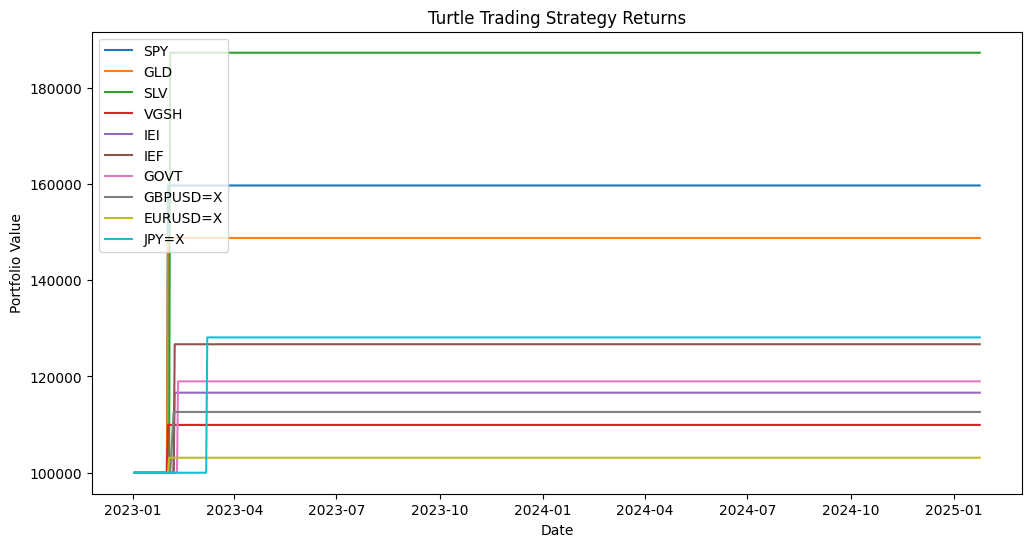

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def get_turtle_signals(data, entry_period=20, exit_period=10):
    signals = pd.DataFrame(index=data.index, columns=['Entry_Long', 'Entry_Short', 'Exit_Long', 'Exit_Short'])

    signals['Entry_Long'] = data['Close'] > data['High'].rolling(window=entry_period).max().shift(1)
    signals['Entry_Short'] = data['Close'] < data['Low'].rolling(window=entry_period).min().shift(1)
    signals['Exit_Long'] = data['Close'] < data['Low'].rolling(window=exit_period).min().shift(1)
    signals['Exit_Short'] = data['Close'] > data['High'].rolling(window=exit_period).max().shift(1)

    return signals

def calculate_returns(data, signals, initial_capital=100000):
    position = 0
    capital = initial_capital
    returns = []

    for i in range(len(data)):
        if signals['Entry_Long'].iloc[i] and position == 0:
            position = 1
            entry_price = data['Close'].iloc[i]
        elif signals['Entry_Short'].iloc[i] and position == 0:
            position = -1
            entry_price = data['Close'].iloc[i]
        elif (signals['Exit_Long'].iloc[i] and position == 1) or (signals['Exit_Short'].iloc[i] and position == -1):
            position = 0

        if position != 0:
            daily_return = (data['Close'].iloc[i] - data['Close'].iloc[i-1]) / data['Close'].iloc[i-1]
            capital *= (1 + position * daily_return)

        returns.append(capital)

    return pd.Series(returns, index=data.index)

def turtle_trading_backtest(symbols, start_date, end_date, entry_period=20, exit_period=10):
    all_data = {}
    all_signals = {}
    all_returns = {}

    for symbol in symbols:
        data = yf.download(symbol, start=start_date, end=end_date)
        signals = get_turtle_signals(data, entry_period, exit_period)
        returns = calculate_returns(data, signals)

        all_data[symbol] = data
        all_signals[symbol] = signals
        all_returns[symbol] = returns

    return all_data, all_signals, all_returns

def plot_returns(all_returns):
    plt.figure(figsize=(12, 6))
    for symbol, returns in all_returns.items():
        plt.plot(returns.index, returns, label=symbol)
    plt.title('Turtle Trading Strategy Returns')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.show()

# Example usage
symbols = ['SPY', 'GLD', 'SLV', 'VGSH', 'IEI', 'IEF', 'GOVT', 'GBPUSD=X', 'EURUSD=X', 'JPY=X']
start_date = '2023-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

all_data, all_signals, all_returns = turtle_trading_backtest(symbols, start_date, end_date)

# Print final returns
for symbol, returns in all_returns.items():
    final_return = (returns.iloc[-1] - returns.iloc[0]) / returns.iloc[0] * 100
    # Convert final_return to a single float value
    final_return = final_return.values[0] if isinstance(final_return, pd.Series) else final_return # If final_return is a Series take the first value, if not use the existing final_return
    print(f"{symbol} Final Return: {final_return:.2f}%")

# Plot returns
plot_returns(all_returns)


Add in

TOM strategy: https://www.quantseeker.com/p/turn-of-the-month-strategies-do-they

OPTOIN Overlay: https://github.com/mattgarippa/options-implied-probability


